In [195]:
# Importing the necessary libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
import random
warnings.filterwarnings("ignore") 

from sklearn.metrics import confusion_matrix, classification_report

In [196]:
# Read dataset using pandas library

df= pd.read_csv('Dataset_new.csv')  
df.head(10)

,customerID,Name,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,...,Married,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Streaming Music,Premium Tech Support,Unlimited Data,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
0,3668-QPYBK,Nabin Sapkota,Male,0,No,No,2,Yes,No,DSL,...,No,314.1,21,No,No,Yes,0.0,0,628.2,3872.7
1,9237-HQITU,Deepika Danwar,Female,0,No,No,2,Yes,No,Fiber optic,...,No,273.6,51,No,No,Yes,0.0,0,547.2,5096.7
2,9305-CDSKC,Swati Baral,Female,0,No,No,8,Yes,Yes,Fiber optic,...,No,364.5,26,Yes,No,Yes,0.0,0,2916.0,27531.0
3,7892-POOKP,Kalpita Subba,Female,0,Yes,No,28,Yes,Yes,Fiber optic,...,Yes,146.7,47,Yes,Yes,Yes,0.0,0,4107.6,95489.1
4,0280-XJGEX,Tulsi Duwadi,Male,0,No,No,49,Yes,Yes,Fiber optic,...,No,1329.9,11,Yes,No,Yes,0.0,0,65165.1,216254.1
5,4190-MFLUW,Medhavi Magar,Female,0,Yes,Yes,10,Yes,No,DSL,...,Yes,282.3,69,No,Yes,Yes,0.0,0,2823.0,18673.5
6,8779-QRDMV,Kanak Pokhrel,Male,1,No,No,1,No,No phone service,DSL,...,No,0.0,8,No,No,No,0.0,600,0.0,1789.5
7,1066-JKSGK,Hina Paneru,Male,0,No,No,1,Yes,No,No,...,No,1007.4,0,No,No,No,0.0,0,1007.4,1611.9
8,6467-CHFZW,Dharma Sherpa,Male,0,Yes,Yes,47,Yes,Yes,Fiber optic,...,Yes,940.5,16,Yes,No,Yes,0.0,0,44203.5,186678.0
9,8665-UTDHZ,Mani Mali,Male,0,Yes,Yes,1,No,No phone service,DSL,...,Yes,0.0,58,No,No,Yes,0.0,0,0.0,906.0


# Data Cleaning 

Dropping columns which are not required for the data analysis and modeling purpose

In [197]:
drop_columns= ['customerID','Name']
df.drop(drop_columns,inplace=True, axis=1)

Since, the customer ID and Name which are not required for prediction are removed. Let's view the final table after removal.

Converting Senior Citizen to Object


In [198]:
df['SeniorCitizen'].replace({0 : 'No', 1 : 'Yes'}, inplace=True) 

Since, Tenure can't be zero lets fix it!

In [199]:
df['Tenure'].replace({0 : np.nan}, inplace=True)

Checking null values in each columns

In [200]:
df.isnull().sum()

Gender                                0
SeniorCitizen                         0
Partner                               0
Dependents                            0
Tenure                               11
PhoneService                          0
MultipleLines                         0
InternetService                       0
OnlineSecurity                        0
OnlineBackup                          0
DeviceProtection                      0
TechSupport                           0
StreamingTV                           0
StreamingMovies                       0
Contract                              0
PaperlessBilling                      0
PaymentMethod                         0
MonthlyCharges                        0
TotalCharges                         11
Churn                                 0
Age                                   0
Under 30                              0
Married                               0
Avg Monthly Long Distance Charges     0
Avg Monthly GB Download               0


Since, there are 11 null values in Total charges. As there are total of 7043 columns, 
dropping only 11 won't make huge impacts

In [201]:
df.dropna(inplace=True)

After, removing null values let us check them back if null values are removed!

In [202]:
df.isnull().sum()

Gender                               0
SeniorCitizen                        0
Partner                              0
Dependents                           0
Tenure                               0
PhoneService                         0
MultipleLines                        0
InternetService                      0
OnlineSecurity                       0
OnlineBackup                         0
DeviceProtection                     0
TechSupport                          0
StreamingTV                          0
StreamingMovies                      0
Contract                             0
PaperlessBilling                     0
PaymentMethod                        0
MonthlyCharges                       0
TotalCharges                         0
Churn                                0
Age                                  0
Under 30                             0
Married                              0
Avg Monthly Long Distance Charges    0
Avg Monthly GB Download              0
Streaming Music          

Check for the total churn values in our datasets

In [203]:
df['Churn'].value_counts()

Churn
No     5163
Yes    1869
Name: count, dtype: int64

### Dealing with categorical columns

Choosing all the categorical columns

In [204]:
categorical_columns = df.select_dtypes(include="object")

Selecting each of the unique values from the categorical columns 

In [205]:
for column in categorical_columns.columns:
    label = f'{column} : {categorical_columns[column].unique()}'
    print(label)

Gender : ['Male' 'Female']
SeniorCitizen : ['No' 'Yes']
Partner : ['No' 'Yes']
Dependents : ['No' 'Yes']
PhoneService : ['Yes' 'No']
MultipleLines : ['No' 'Yes' 'No phone service']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['Yes' 'No' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'Two year' 'One year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['eSewa' 'Cash' 'Mobile Banking' 'Credit card (automatic)']
Churn : ['Yes' 'No']
Under 30 : ['No' 'Yes']
Married : ['No' 'Yes']
Streaming Music : ['No' 'Yes']
Premium Tech Support : ['No' 'Yes']
Unlimited Data : ['Yes' 'No']


Since 'No internet service' and 'No phone service' are same as 'No'. Replace them with 'No'

In [206]:
df.replace('No internet service','No',inplace=True)
df.replace('No phone service','No',inplace=True)

Checking if the values are replaced. 

In [207]:
categorical_columns = df.select_dtypes(include="object")
for column in categorical_columns.columns:
    label = f'{column} : {categorical_columns[column].unique()}'
    print(label)

Gender : ['Male' 'Female']
SeniorCitizen : ['No' 'Yes']
Partner : ['No' 'Yes']
Dependents : ['No' 'Yes']
PhoneService : ['Yes' 'No']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['Yes' 'No']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'Two year' 'One year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['eSewa' 'Cash' 'Mobile Banking' 'Credit card (automatic)']
Churn : ['Yes' 'No']
Under 30 : ['No' 'Yes']
Married : ['No' 'Yes']
Streaming Music : ['No' 'Yes']
Premium Tech Support : ['No' 'Yes']
Unlimited Data : ['Yes' 'No']


In [208]:
Palette_values = ['Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'cubehelix', 'cubehelix_r', 'terrain', 'terrain_r', 'tab10', 'tab10_r',
                             'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'viridis', 'viridis_r', 'plasma', 'plasma_r']


Differentiate categorical and numerical values for visualizing data

In [209]:
features = df.drop('Churn', axis=1)
target = df['Churn']
numerical_columns = features.select_dtypes(exclude='object').columns.tolist()
categorical_columns = features.select_dtypes(include='object').columns.tolist()

### Working with categorical values

In [210]:
len(categorical_columns)

21

There are total of 21 categorical columns. Let's view them

In [211]:
categorical_columns

['Gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Under 30',
 'Married',
 'Streaming Music',
 'Premium Tech Support',
 'Unlimited Data']

### Target Variable check

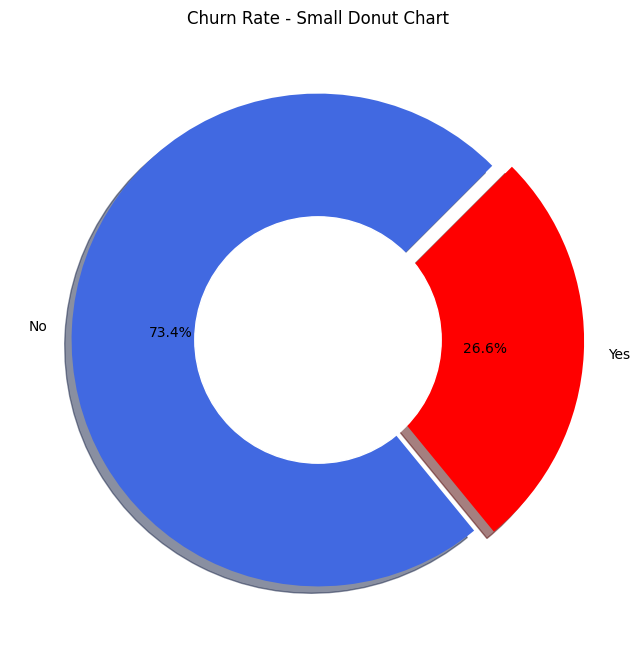

In [212]:
# Create a pie chart for the "Churn" column in the DataFrame

plt.figure(figsize=(8, 8))  
colors = ['#4169e1', '#ff0000']

# Set shadow, startangle, labels, autopct, explode, and colors

plt.pie(df["Churn"].value_counts(), shadow=True, startangle=45,
        labels=df["Churn"].value_counts().index, autopct='%0.1f%%',
        explode=(0, 0.08), colors=colors)

# Create a white circle at the center to make a donut chart

centre_circle = plt.Circle((0, 0), 0.5, color='white', fc='white')
plt.gca().add_artist(centre_circle)

plt.title('Churn Rate - Small Donut Chart')
plt.savefig('Churn_rate_small_donut.png')
plt.show()


### Checking for outliers

In [213]:
num_columns = df.select_dtypes(exclude='object').columns.tolist()
num_columns

['Tenure',
 'MonthlyCharges',
 'TotalCharges',
 'Age',
 'Avg Monthly Long Distance Charges',
 'Avg Monthly GB Download',
 'Total Refunds',
 'Total Extra Data Charges',
 'Total Long Distance Charges',
 'Total Revenue']

### Applying z-score to check if there are any outliers in our datasets


If the z-score is greater than and equals to 3. We have outliers in that column.

In [214]:
# Define a function to fill missing values with the mean of each column.

def replace_outliers(value, mean, std):
    z_score = np.abs(value - mean) / std
    return value if z_score <= 3 else np.nan

# Applies to each column of the DataFrame using the apply method
# Only fills missing values if any are present in the column

for column in numerical_columns:
    mean = df[column].mean()
    std = df[column].std()
    df[column] = df[column].apply(replace_outliers, args=(mean, std))


In [215]:
df.isnull().sum()

Gender                                 0
SeniorCitizen                          0
Partner                                0
Dependents                             0
Tenure                                 0
PhoneService                           0
MultipleLines                          0
InternetService                        0
OnlineSecurity                         0
OnlineBackup                           0
DeviceProtection                       0
TechSupport                            0
StreamingTV                            0
StreamingMovies                        0
Contract                               0
PaperlessBilling                       0
PaymentMethod                          0
MonthlyCharges                         0
TotalCharges                           0
Churn                                  0
Age                                    0
Under 30                               0
Married                                0
Avg Monthly Long Distance Charges      0
Avg Monthly GB D

Outliers found in Total Refunds, Total Extra Data Charges, Total Long Distance Charges, Total Revenue and Avg Monthly GB Download. Now, we have to remove outliers.

### Replacing the outliers with null values by applying mean methods

In [216]:
# Assuming 'df' is a DataFrame with potentially missing values
# Applying a lambda function to each column of the DataFrame

df = df.apply(lambda column: column.fillna(column.mean()) if column.isnull().any() else column, axis=0)



In [217]:
# Checking back all the null values or outliers again
df.isnull().sum()

Gender                               0
SeniorCitizen                        0
Partner                              0
Dependents                           0
Tenure                               0
PhoneService                         0
MultipleLines                        0
InternetService                      0
OnlineSecurity                       0
OnlineBackup                         0
DeviceProtection                     0
TechSupport                          0
StreamingTV                          0
StreamingMovies                      0
Contract                             0
PaperlessBilling                     0
PaymentMethod                        0
MonthlyCharges                       0
TotalCharges                         0
Churn                                0
Age                                  0
Under 30                             0
Married                              0
Avg Monthly Long Distance Charges    0
Avg Monthly GB Download              0
Streaming Music          

In [218]:
df['Churn'].replace({'Yes' : 1, 'No' : 0}, inplace = True)


### Move the churn column to the last!

In [219]:
# To move the churn or target column to the last. Use the pop method, store it in churn column and insert it in the df again. 

churn_column = df.pop('Churn')
df.insert(len(df.columns), 'Churn', churn_column)


In [220]:
df.tail(10)

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Streaming Music,Premium Tech Support,Unlimited Data,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Churn
7033,Female,No,No,No,2.0,Yes,No,No,No,No,...,205.5,0.0,No,No,No,0.000000,0.0,411.0,1588.5,0
7034,Male,Yes,Yes,No,55.0,Yes,Yes,DSL,Yes,Yes,...,272.4,23.0,No,No,Yes,0.000000,0.0,14982.0,114465.0,0
7035,Male,No,No,No,38.0,Yes,No,Fiber optic,No,No,...,1051.2,2.0,No,No,Yes,605.700000,0.0,39945.6,118097.4,0
7036,Male,No,No,No,19.0,Yes,No,Fiber optic,No,No,...,886.5,13.0,No,No,Yes,16.182752,0.0,16843.5,60891.3,0
7037,Female,No,No,No,12.0,No,No,DSL,No,Yes,...,0.0,24.0,Yes,Yes,Yes,16.182752,0.0,0.0,21086.7,0
7038,Female,No,No,No,72.0,Yes,No,No,No,No,...,683.1,0.0,No,No,No,579.300000,0.0,49183.2,91185.9,0
7039,Male,No,Yes,Yes,24.0,Yes,Yes,DSL,Yes,No,...,1081.5,24.0,Yes,Yes,Yes,16.182752,0.0,25956.0,84224.1,0
7040,Female,No,Yes,Yes,72.0,Yes,Yes,Fiber optic,No,Yes,...,889.8,59.0,Yes,No,Yes,16.182752,0.0,64065.6,283591.2,0
7041,Female,No,Yes,Yes,11.0,No,No,DSL,Yes,No,...,0.0,17.0,No,No,Yes,16.182752,0.0,0.0,9576.3,0
7042,Male,No,No,No,66.0,Yes,No,Fiber optic,Yes,No,...,928.8,11.0,Yes,Yes,Yes,0.000000,0.0,61300.8,266635.8,0


Finally the target value has moved to the end.

# Feature Selection

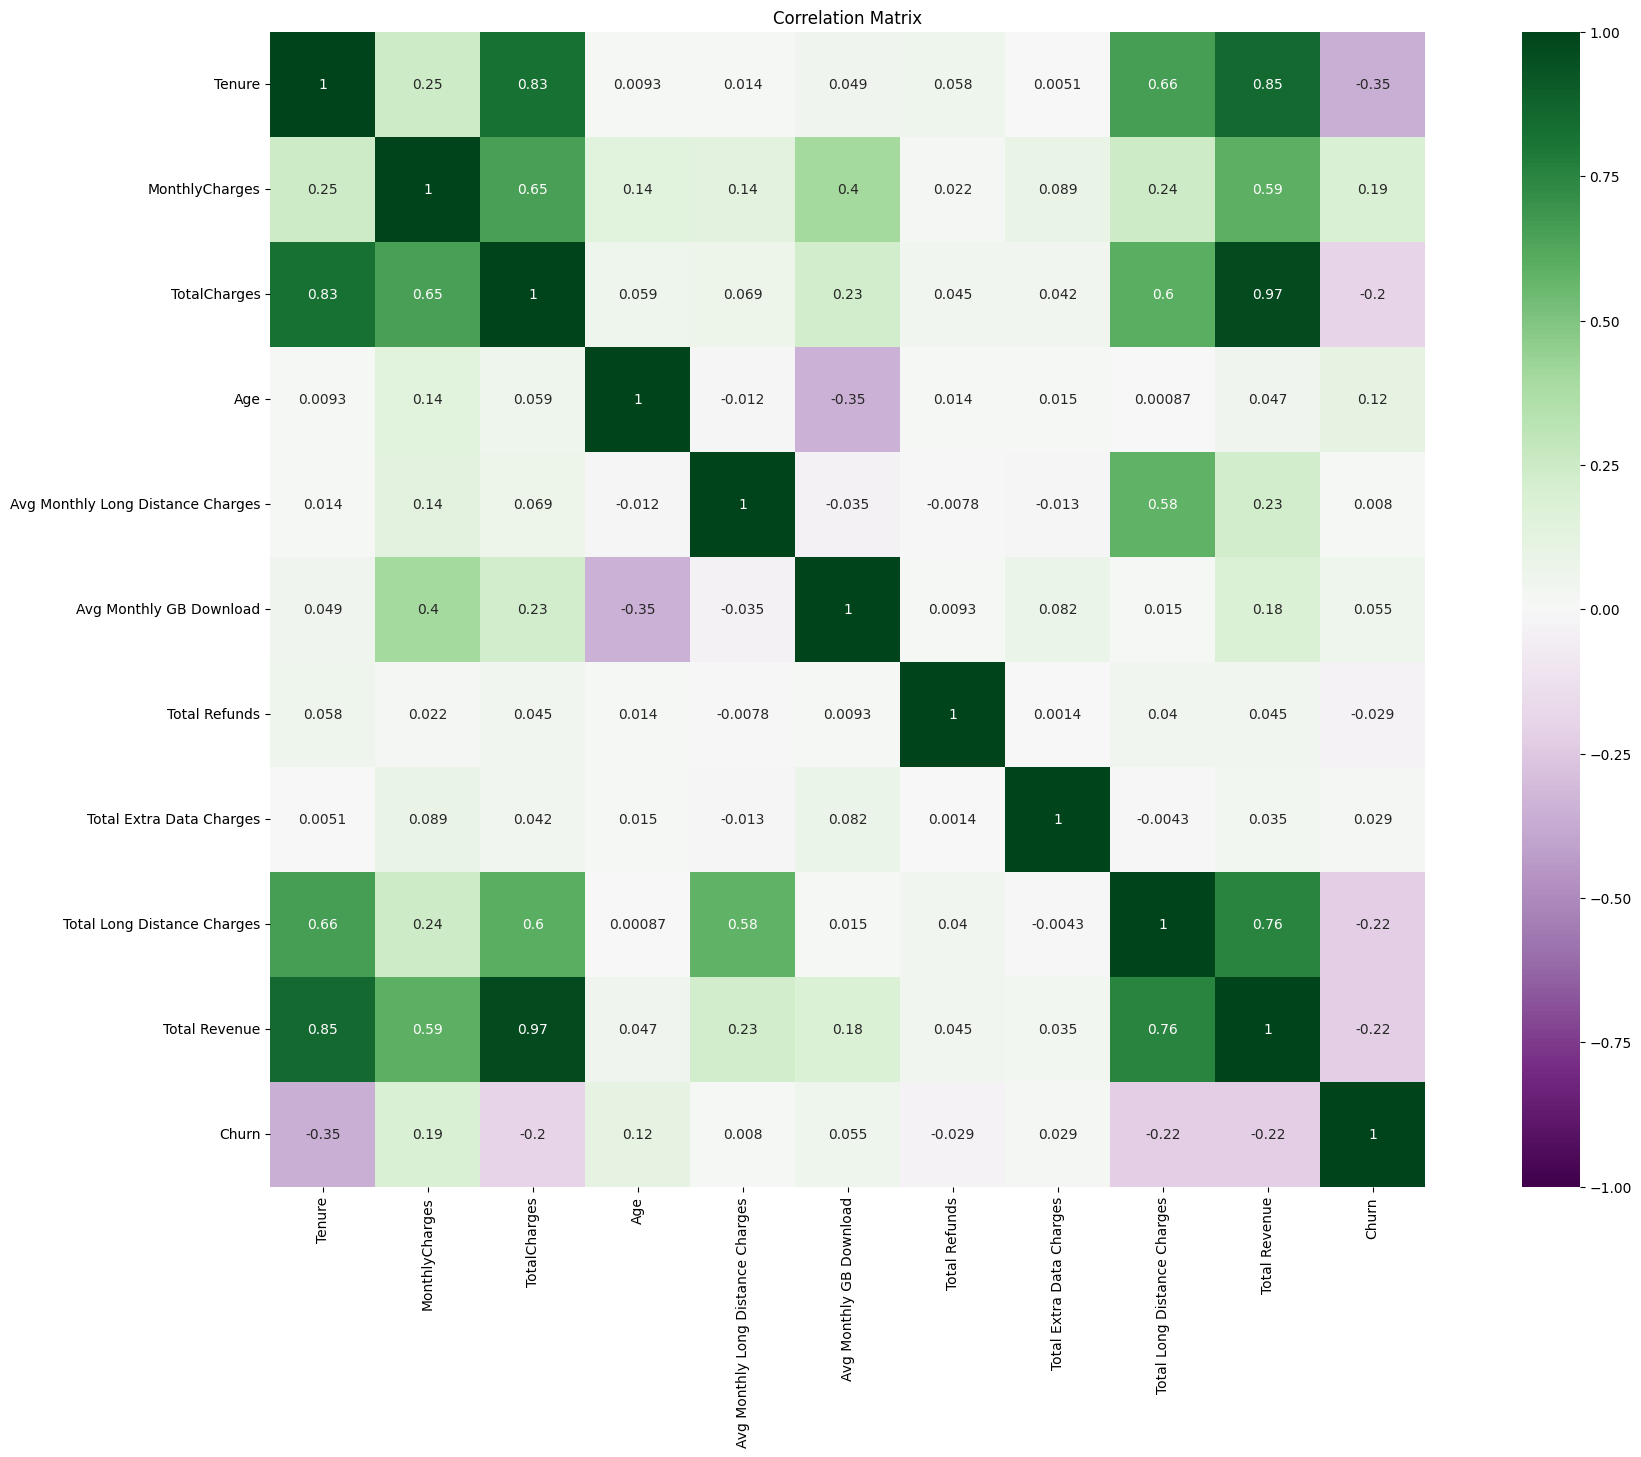

In [221]:
# Selecting only numerical columns from the DataFrame

numeric_df = df.select_dtypes(include=['number'])
corr = numeric_df.corr()

# Creating a subplot with a specified size for the correlation heatmap
fig, ax = plt.subplots(figsize=(25, 15))
sns.heatmap(corr, vmax=1, vmin=-1, annot=True, cmap='PRGn', square=True, ax=ax)

plt.title('Correlation Matrix') 
plt.show()


Highly correlated values is Total Revenue --> Tenure, TotalCharges, Total Long Distance Charges




Married is same as Partner. Under 30 can be known through ages columns.


Dropping columns Tenure, TotalCharges, Total Long Distance Charges, Married and Under 30.

In [222]:
df.drop(['TotalCharges', 'Total Revenue','Under 30', 'Total Refunds', 
    'Total Extra Data Charges', 'Avg Monthly Long Distance Charges','Married','Total Long Distance Charges','Gender', 'SeniorCitizen'], axis=1, inplace=True)

### Concatenating the streaming columns into one single column

In [223]:
streaming_cols = ['StreamingTV', 'StreamingMovies', 'Streaming Music']
df['StreamingTV'].replace({'Yes' : 1, 'No' : 0}, inplace=True)
df['StreamingMovies'].replace({'Yes' : 1, 'No' : 0}, inplace=True)
df['Streaming Music'].replace({'Yes' : 1, 'No' : 0}, inplace=True)


Checking if the customer have any streaming services 

In [224]:
temp_col = (df['StreamingTV'] | df['StreamingMovies'] | df['Streaming Music'])
temp_col.value_counts()

1    3594
0    3438
Name: count, dtype: int64

In [225]:
# Dropping the streaming columns 
df.drop(streaming_cols, axis=1, inplace=True)
df


,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Age,Avg Monthly GB Download,Premium Tech Support,Unlimited Data,Churn
0,No,No,2.0,Yes,No,DSL,Yes,Yes,No,No,Month-to-month,Yes,eSewa,1615.5,37,21.0,No,Yes,1
1,No,No,2.0,Yes,No,Fiber optic,No,No,No,No,Month-to-month,Yes,Cash,2121.0,19,51.0,No,Yes,1
2,No,No,8.0,Yes,Yes,Fiber optic,No,No,Yes,No,Month-to-month,Yes,Cash,2989.5,31,26.0,No,Yes,1
3,Yes,No,28.0,Yes,Yes,Fiber optic,No,No,Yes,Yes,Month-to-month,Yes,Cash,3144.0,23,47.0,Yes,Yes,1
4,No,No,49.0,Yes,Yes,Fiber optic,No,Yes,Yes,No,Month-to-month,Yes,Mobile Banking,3111.0,38,11.0,No,Yes,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,No,No,72.0,Yes,No,No,No,No,No,No,Two year,Yes,Mobile Banking,634.5,30,0.0,No,No,0
7039,Yes,Yes,24.0,Yes,Yes,DSL,Yes,No,Yes,Yes,One year,Yes,eSewa,2544.0,38,24.0,Yes,Yes,0
7040,Yes,Yes,72.0,Yes,Yes,Fiber optic,No,Yes,Yes,No,One year,Yes,Credit card (automatic),3096.0,30,59.0,No,Yes,0
7041,Yes,Yes,11.0,No,No,DSL,Yes,No,No,No,Month-to-month,Yes,Cash,888.0,32,17.0,No,Yes,0


In [226]:
df.insert(loc=6, column='StreamingServices', value=temp_col)
df

,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,StreamingServices,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Age,Avg Monthly GB Download,Premium Tech Support,Unlimited Data,Churn
0,No,No,2.0,Yes,No,DSL,0,Yes,Yes,No,No,Month-to-month,Yes,eSewa,1615.5,37,21.0,No,Yes,1
1,No,No,2.0,Yes,No,Fiber optic,0,No,No,No,No,Month-to-month,Yes,Cash,2121.0,19,51.0,No,Yes,1
2,No,No,8.0,Yes,Yes,Fiber optic,1,No,No,Yes,No,Month-to-month,Yes,Cash,2989.5,31,26.0,No,Yes,1
3,Yes,No,28.0,Yes,Yes,Fiber optic,1,No,No,Yes,Yes,Month-to-month,Yes,Cash,3144.0,23,47.0,Yes,Yes,1
4,No,No,49.0,Yes,Yes,Fiber optic,1,No,Yes,Yes,No,Month-to-month,Yes,Mobile Banking,3111.0,38,11.0,No,Yes,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,No,No,72.0,Yes,No,No,0,No,No,No,No,Two year,Yes,Mobile Banking,634.5,30,0.0,No,No,0
7039,Yes,Yes,24.0,Yes,Yes,DSL,1,Yes,No,Yes,Yes,One year,Yes,eSewa,2544.0,38,24.0,Yes,Yes,0
7040,Yes,Yes,72.0,Yes,Yes,Fiber optic,1,No,Yes,Yes,No,One year,Yes,Credit card (automatic),3096.0,30,59.0,No,Yes,0
7041,Yes,Yes,11.0,No,No,DSL,0,Yes,No,No,No,Month-to-month,Yes,Cash,888.0,32,17.0,No,Yes,0


### Save the datasets 

In [227]:
# Save the model datasets in the desktop

df.to_csv('Modelling_Dataset.csv', index=False)

# Data Modelling

### Dividing target and independent variable

In [228]:
df.columns

Index(['Partner', 'Dependents', 'Tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'StreamingServices', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'Age',
       'Avg Monthly GB Download', 'Premium Tech Support', 'Unlimited Data',
       'Churn'],
      dtype='object')

In [229]:
# View the shape of dataframe as x and y axis

df.shape

(7032, 20)

X as independent variable and Y as target variable.

In [230]:
X = df.drop('Churn', axis = 1)
y = df.Churn

### Converting categorical columns into ordinal and one hot encoding 

In [231]:
is_ordinal, is_onehot = list(), list()

# Extracting lists of categorical and numerical column names from the DataFrame

categorical_column = X.select_dtypes(include = 'object').columns.tolist()
numerical_column = X.select_dtypes(exclude = 'object').columns.tolist()

# Iterating through each categorical column to determine if it's ordinal or one-hot encoded

for col in categorical_column:
    unique_values = df[col].nunique()
    if unique_values == 2:
        is_ordinal.append(col)
    else:
        is_onehot.append(col)


In [232]:
is_ordinal

['Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'PaperlessBilling',
 'Premium Tech Support',
 'Unlimited Data']

In [233]:
is_onehot

['InternetService', 'Contract', 'PaymentMethod']

In [234]:
numerical_column

['Tenure',
 'StreamingServices',
 'MonthlyCharges',
 'Age',
 'Avg Monthly GB Download']

In [235]:
total_columns_check= len(is_ordinal)+ len(is_onehot)+ len(numerical_column)

In [236]:
total_columns_check

19

### Pipeline Building!

In [237]:
# Import all the scikit learn library for pipeline building

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer



In [238]:
numerical_pipeline = Pipeline(steps = [
    ('imputer', SimpleImputer(missing_values=np.nan, strategy='mean')),
    ('scaler', MinMaxScaler(feature_range=(0, 1)))
])


In [239]:
oneHotEncoding_pipeline = Pipeline(steps = [
    ('imputer', SimpleImputer(missing_values=None, strategy='most_frequent')),
    ('encoder', OneHotEncoder())
])


In [240]:
ordinal_pipeline = Pipeline(steps = [
    ('imputer', SimpleImputer(missing_values=None, strategy='most_frequent')),
    ('encoder', OrdinalEncoder())
])

In [241]:
transformColumn = ColumnTransformer(transformers = [
    ('numerical', numerical_pipeline, numerical_column),    
    ('ordinal', ordinal_pipeline, is_ordinal), 
    ('onehot', oneHotEncoding_pipeline, is_onehot)     
])


In [242]:
dummy_model = Pipeline(steps = [
    ('processor', transformColumn)])
_ = dummy_model.fit(X, y)

In [243]:
is_onehot2 = list(dummy_model.named_steps['processor'].named_transformers_['onehot'].named_steps['encoder'].get_feature_names_out(input_features=is_onehot))

In [244]:
# Creating a final list of numerical columns by combining original numerical columns
# columns identified as ordinal, and columns identified as one-hot encoded
numerical_columns_final = list(numerical_column)
numerical_columns_final.extend(is_ordinal)
numerical_columns_final.extend(is_onehot2)
numerical_columns_final

['Tenure',
 'StreamingServices',
 'MonthlyCharges',
 'Age',
 'Avg Monthly GB Download',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'PaperlessBilling',
 'Premium Tech Support',
 'Unlimited Data',
 'InternetService_DSL',
 'InternetService_Fiber optic',
 'InternetService_No',
 'Contract_Month-to-month',
 'Contract_One year',
 'Contract_Two year',
 'PaymentMethod_Cash',
 'PaymentMethod_Credit card (automatic)',
 'PaymentMethod_Mobile Banking',
 'PaymentMethod_eSewa']

In [245]:
len(numerical_columns_final)

26

In [246]:
X = transformColumn.fit_transform(X)

In [247]:
X.shape

(7032, 26)

In [248]:
y.value_counts()

Churn
0    5163
1    1869
Name: count, dtype: int64

### New Dataframe for model training 


In [249]:
model_df_X= pd.DataFrame(X, columns= numerical_columns_final)

In [250]:
model_df_X

,Tenure,StreamingServices,MonthlyCharges,Age,Avg Monthly GB Download,Partner,Dependents,PhoneService,MultipleLines,OnlineSecurity,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Cash,PaymentMethod_Credit card (automatic),PaymentMethod_Mobile Banking,PaymentMethod_eSewa
0,0.014085,0.0,0.354229,0.295082,0.276316,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.014085,0.0,0.521891,0.000000,0.671053,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.098592,1.0,0.809950,0.196721,0.342105,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.380282,1.0,0.861194,0.065574,0.618421,1.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.676056,1.0,0.850249,0.311475,0.144737,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,1.000000,0.0,0.028856,0.180328,0.000000,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
7028,0.323944,1.0,0.662189,0.311475,0.315789,1.0,1.0,1.0,1.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
7029,1.000000,1.0,0.845274,0.180328,0.776316,1.0,1.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
7030,0.140845,0.0,0.112935,0.213115,0.223684,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [251]:
model_df_X.describe().T

,count,mean,std,min,25%,50%,75%,max
Tenure,7032.0,0.442560,0.345708,0.0,0.112676,0.394366,0.760563,1.0
StreamingServices,7032.0,0.511092,0.499912,0.0,0.000000,1.000000,1.000000,1.0
MonthlyCharges,7032.0,0.463166,0.299363,0.0,0.172512,0.518408,0.712562,1.0
Age,7032.0,0.451169,0.274616,0.0,0.213115,0.442623,0.672131,1.0
Avg Monthly GB Download,7032.0,0.259277,0.251313,0.0,0.039474,0.223684,0.355263,1.0
Partner,7032.0,0.482509,0.499729,0.0,0.000000,0.000000,1.000000,1.0
Dependents,7032.0,0.298493,0.457629,0.0,0.000000,0.000000,1.000000,1.0
PhoneService,7032.0,0.903299,0.295571,0.0,1.000000,1.000000,1.000000,1.0
MultipleLines,7032.0,0.421928,0.493902,0.0,0.000000,0.000000,1.000000,1.0
OnlineSecurity,7032.0,0.286547,0.452180,0.0,0.000000,0.000000,1.000000,1.0


### Split New Datasets into train and test

In [252]:
# Import all the libraries for model training and evaluation metrices

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB  
from sklearn.tree import DecisionTreeClassifier 

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
import time 
from sklearn.metrics import accuracy_score,roc_curve,  roc_auc_score
import sys 
import os

In [253]:
# Divide the train and test data

X_train, X_test,y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=23)

In [254]:
X_train.shape

(5625, 26)

In [255]:
X_test.shape

(1407, 26)

### Function to evaluate classification reports

In [256]:
def display_test_scores(test, pred):
    str_out = "\n"
    str_out += ("#####  TEST SCORES  #####\n--------------------")
    str_out += ("\n")

    #print accuracy
    accuracy = accuracy_score(test, pred)
    str_out += ("ACCURACY: {:.4f}\n".format(accuracy))
    str_out += ("\n")

    #print AUC score
    auc = roc_auc_score(test, pred)
    str_out += ("AUC: {:.4f}\n".format(auc))
    str_out += ("\n")

    #print confusion matrix
    str_out += ("CONFUSION MATRIX:\n--------------------\n")
    conf_mat = confusion_matrix(test, pred)
    str_out += ("{}".format(conf_mat))
    str_out += ("\n")
    str_out += ("\n--------------------\n")

    #print classification report
    str_out += ("{}".format(classification_report(test, pred)))
    
    false_indexes = np.where(test != pred)
    return str_out, false_indexes

# Logistic Regression

In [257]:
# Use logistic regression model 
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred= lr.predict(X_test)
results, false = display_test_scores(y_test, y_pred)
print(results)


#####  TEST SCORES  #####
--------------------
ACCURACY: 0.7967

AUC: 0.7150

CONFUSION MATRIX:
--------------------
[[922 120]
 [166 199]]

--------------------
              precision    recall  f1-score   support

           0       0.85      0.88      0.87      1042
           1       0.62      0.55      0.58       365

    accuracy                           0.80      1407
   macro avg       0.74      0.72      0.72      1407
weighted avg       0.79      0.80      0.79      1407



### Tuning with 3 candidates

In [258]:
# Selecting parameter for tuning

param_grid = {
    'C': [ 0.1, 1, 10],
    'penalty': ['l1','l2'], 
    'solver': ['liblinear','lbfgs']  
}

In [259]:
start_time = time.time()
grid_search = GridSearchCV(lr, param_grid, verbose=1,cv=5, scoring='accuracy')

In [260]:
grid_search.fit(X_train, y_train)
end_time = time.time()

print("The best parameters are %s " % (grid_search.best_params_))
print("\nRun time for train & test cv (Logistic Regression): ", end_time - start_time)

y_pred = grid_search.predict(X_test)
results, false = display_test_scores(y_test, y_pred)
print(results)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
The best parameters are {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'} 

Run time for train & test cv (Logistic Regression):  1.5835952758789062

#####  TEST SCORES  #####
--------------------
ACCURACY: 0.7996

AUC: 0.7116

CONFUSION MATRIX:
--------------------
[[932 110]
 [172 193]]

--------------------
              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1042
           1       0.64      0.53      0.58       365

    accuracy                           0.80      1407
   macro avg       0.74      0.71      0.72      1407
weighted avg       0.79      0.80      0.79      1407



### Tuning with 7 candidates 

In [261]:
param_grid2 = {
    'C': [ 0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'penalty': ['l1', 'l2'], 
    'solver': [ 'lbfgs', 'liblinear']  
}


In [262]:
# Use of grid search CV
start_time = time.time()
grid_search2 = GridSearchCV(lr, param_grid2, verbose=1,cv=5, scoring='accuracy')

In [263]:
grid_search2.fit(X_train, y_train)
end_time = time.time()

print("The best parameters are %s " % (grid_search2.best_params_))
print("\nRun time for train & test cv (Logistic Regression): ", end_time - start_time)

y_pred = grid_search2.predict(X_test)
results, false = display_test_scores(y_test, y_pred)
print(results)

Fitting 5 folds for each of 28 candidates, totalling 140 fits
The best parameters are {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'} 

Run time for train & test cv (Logistic Regression):  3.3083977699279785

#####  TEST SCORES  #####
--------------------
ACCURACY: 0.7996

AUC: 0.7116

CONFUSION MATRIX:
--------------------
[[932 110]
 [172 193]]

--------------------
              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1042
           1       0.64      0.53      0.58       365

    accuracy                           0.80      1407
   macro avg       0.74      0.71      0.72      1407
weighted avg       0.79      0.80      0.79      1407



# Random Forest Classifier

In [264]:
# Using random forest classifier

rf= RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred= rf.predict(X_test)
results, false = display_test_scores(y_test, y_pred)
print(results)


#####  TEST SCORES  #####
--------------------
ACCURACY: 0.7854

AUC: 0.6931

CONFUSION MATRIX:
--------------------
[[922 120]
 [182 183]]

--------------------
              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1042
           1       0.60      0.50      0.55       365

    accuracy                           0.79      1407
   macro avg       0.72      0.69      0.70      1407
weighted avg       0.78      0.79      0.78      1407



### Tuning n_ estimators with 3 values

In [265]:
param_dist = {
    'n_estimators': [20, 40, 60],
    'max_features': [0.2,0.4],
    'max_depth': [2, 4],
    'max_samples': [0.5, 0.6]
}

In [266]:
# Fitting a Random Forest model with hyperparameter tuning using RandomizedSearchCV
# Assuming 'rf_random' is a RandomizedSearchCV object previously defined and configured

start_time = time.time()
rf_random = RandomizedSearchCV(rf, param_distributions=param_dist, n_iter=50, cv=5, verbose=1, n_jobs=-1, random_state=42)

In [267]:
rf_random.fit(X_train, y_train)
end_time = time.time()

print("The best parameters are %s " % (rf_random.best_params_))
print("\nRun time for train & test cv (Random Forest ): ", end_time - start_time)

# Displaying test scores and false predictions using a custom function 'display_test_scores'
# Assuming 'display_test_scores' is a function that evaluates model performance

y_pred = rf_random.predict(X_test)
results, false = display_test_scores(y_test, y_pred)
print(results)


Fitting 5 folds for each of 24 candidates, totalling 120 fits
The best parameters are {'n_estimators': 40, 'max_samples': 0.6, 'max_features': 0.4, 'max_depth': 4} 

Run time for train & test cv (Random Forest ):  15.5792236328125

#####  TEST SCORES  #####
--------------------
ACCURACY: 0.7925

AUC: 0.6632

CONFUSION MATRIX:
--------------------
[[971  71]
 [221 144]]

--------------------
              precision    recall  f1-score   support

           0       0.81      0.93      0.87      1042
           1       0.67      0.39      0.50       365

    accuracy                           0.79      1407
   macro avg       0.74      0.66      0.68      1407
weighted avg       0.78      0.79      0.77      1407



### Tuning n_estimators with 6 values

In [268]:
param_dist2 = {
    'n_estimators': [140, 160, 180, 200,220,240],
    'max_features': [0.6, 0.8, 1.0],
    'max_depth': [6, 8, 10, 12, 14],
    'max_samples': [0.7, 0.8, 0.9, 1.0]
}


In [269]:
start_time = time.time()
rf_random2 = RandomizedSearchCV(rf, param_distributions=param_dist2, n_iter=50, cv=5, verbose=2, n_jobs=-1, random_state=42)


In [270]:
rf_random2.fit(X_train, y_train)
end_time = time.time()

print("The best parameters are %s " % (rf_random2.best_params_))
print("\nRun time for train & test cv (Random Forest Regression): ", end_time - start_time)

y_pred = rf_random2.predict(X_test)
results, false = display_test_scores(y_test, y_pred)
print(results)


Fitting 5 folds for each of 50 candidates, totalling 250 fits
The best parameters are {'n_estimators': 200, 'max_samples': 0.8, 'max_features': 0.6, 'max_depth': 6} 

Run time for train & test cv (Random Forest Regression):  101.48988008499146

#####  TEST SCORES  #####
--------------------
ACCURACY: 0.7989

AUC: 0.7076

CONFUSION MATRIX:
--------------------
[[935 107]
 [176 189]]

--------------------
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1042
           1       0.64      0.52      0.57       365

    accuracy                           0.80      1407
   macro avg       0.74      0.71      0.72      1407
weighted avg       0.79      0.80      0.79      1407



# Decision Tree Classifier

In [271]:
# Use of decision tree classifier

dt_classifier = DecisionTreeClassifier(random_state=0, criterion="entropy")
dt_classifier.fit(X_train, y_train)
y_pred= dt_classifier.predict(X_test)
results, false = display_test_scores(y_test, y_pred)
print(results)


#####  TEST SCORES  #####
--------------------
ACCURACY: 0.7363

AUC: 0.6680

CONFUSION MATRIX:
--------------------
[[844 198]
 [173 192]]

--------------------
              precision    recall  f1-score   support

           0       0.83      0.81      0.82      1042
           1       0.49      0.53      0.51       365

    accuracy                           0.74      1407
   macro avg       0.66      0.67      0.66      1407
weighted avg       0.74      0.74      0.74      1407



### Tuning with 3 values of max_depth 

In [272]:
params = {
    'max_depth': [2, 3, 5],
    'min_samples_leaf': [5, 10, 20],
    'criterion': ["gini", "entropy"]
}

In [273]:
start_time = time.time()
grid_dt = GridSearchCV(dt_classifier, param_grid=params, verbose=1, cv=5, n_jobs=-1)

In [274]:
grid_dt.fit(X_train, y_train)
end_time = time.time()

print("The best parameters are %s " % (grid_dt.best_params_))
print("\nRun time for train & test cv (Decision Tree): ", end_time - start_time)

y_pred_dt = grid_dt.predict(X_test)
results_dt, false_dt = display_test_scores(y_test, y_pred_dt)
print(results_dt)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
The best parameters are {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 10} 

Run time for train & test cv (Decision Tree):  0.3693273067474365

#####  TEST SCORES  #####
--------------------
ACCURACY: 0.7939

AUC: 0.6926

CONFUSION MATRIX:
--------------------
[[941 101]
 [189 176]]

--------------------
              precision    recall  f1-score   support

           0       0.83      0.90      0.87      1042
           1       0.64      0.48      0.55       365

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.71      1407
weighted avg       0.78      0.79      0.78      1407



### Tuning with 6 values of max_depth

In [275]:
params = {
    'max_depth': [2, 3, 5, 10, 20, 40],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}

In [276]:
start_time = time.time()
grid_dt2 = GridSearchCV(dt_classifier, param_grid=params, verbose=1, cv=5, n_jobs=-1)

In [277]:
grid_dt2.fit(X_train, y_train)
end_time = time.time()

print("The best parameters are %s " % (grid_dt2.best_params_))
print("\nRun time for train & test cv (Decision Tree): ", end_time - start_time)

y_pred_dt = grid_dt2.predict(X_test)
results_dt, false_dt = display_test_scores(y_test, y_pred_dt)
print(results_dt)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
The best parameters are {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 100} 

Run time for train & test cv (Decision Tree):  0.9269471168518066

#####  TEST SCORES  #####
--------------------
ACCURACY: 0.7953

AUC: 0.6954

CONFUSION MATRIX:
--------------------
[[941 101]
 [187 178]]

--------------------
              precision    recall  f1-score   support

           0       0.83      0.90      0.87      1042
           1       0.64      0.49      0.55       365

    accuracy                           0.80      1407
   macro avg       0.74      0.70      0.71      1407
weighted avg       0.78      0.80      0.79      1407



# Naive Bayes Classifier

In [278]:
nb= GaussianNB()
nb.fit(X_train,y_train)
y_pred= nb.predict(X_test)
results, false = display_test_scores(y_test, y_pred)
print(results)


#####  TEST SCORES  #####
--------------------
ACCURACY: 0.7520

AUC: 0.7604

CONFUSION MATRIX:
--------------------
[[774 268]
 [ 81 284]]

--------------------
              precision    recall  f1-score   support

           0       0.91      0.74      0.82      1042
           1       0.51      0.78      0.62       365

    accuracy                           0.75      1407
   macro avg       0.71      0.76      0.72      1407
weighted avg       0.80      0.75      0.77      1407



### Tuning with var_smoothing upto 1e-2 

In [279]:
params_NB = {'var_smoothing': np.logspace(0,-2, num=10)}

In [280]:
start_time = time.time()
gnb_grid = GridSearchCV(nb, params_NB, cv=5, verbose=1, n_jobs=-1)

In [281]:
gnb_grid.fit(X_test, y_test)
print("The best parameters are %s " % (gnb_grid.best_params_))
print("\nRun time for train & test cv (Naive Bayes using Gaussian NB): ", end_time - start_time)

y_pred = gnb_grid.predict(X_test)
results, false = display_test_scores(y_test, y_pred)
print(results)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
The best parameters are {'var_smoothing': 0.016681005372000592} 

Run time for train & test cv (Naive Bayes using Gaussian NB):  -0.043143272399902344

#####  TEST SCORES  #####
--------------------
ACCURACY: 0.7541

AUC: 0.7619

CONFUSION MATRIX:
--------------------
[[777 265]
 [ 81 284]]

--------------------
              precision    recall  f1-score   support

           0       0.91      0.75      0.82      1042
           1       0.52      0.78      0.62       365

    accuracy                           0.75      1407
   macro avg       0.71      0.76      0.72      1407
weighted avg       0.80      0.75      0.77      1407



### Tuning with values of var_smoothing upto 1e-9 

In [282]:
params_NB2 = {'var_smoothing': np.logspace(0,-9, num=10)}

In [283]:
start_time = time.time()
gnb_grid2 = GridSearchCV(nb, params_NB2, cv=5, verbose=1, n_jobs=-1)

In [284]:
gnb_grid2.fit(X_test, y_test)
print("The best parameters are %s " % (gnb_grid2.best_params_))
print("\nRun time for train & test cv (Naive Bayes using Gaussian NB): ", end_time - start_time)

y_pred = gnb_grid2.predict(X_test)
results, false = display_test_scores(y_test, y_pred)
print(results)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
The best parameters are {'var_smoothing': 0.001} 

Run time for train & test cv (Naive Bayes using Gaussian NB):  -0.1664419174194336

#####  TEST SCORES  #####
--------------------
ACCURACY: 0.7555

AUC: 0.7628

CONFUSION MATRIX:
--------------------
[[779 263]
 [ 81 284]]

--------------------
              precision    recall  f1-score   support

           0       0.91      0.75      0.82      1042
           1       0.52      0.78      0.62       365

    accuracy                           0.76      1407
   macro avg       0.71      0.76      0.72      1407
weighted avg       0.81      0.76      0.77      1407



# Support Vector Machine

In [285]:
svm= SVC()
svm.fit(X_train, y_train)
y_pred= svm.predict(X_test)
results, false = display_test_scores(y_test, y_pred)
print(results)


#####  TEST SCORES  #####
--------------------
ACCURACY: 0.7967

AUC: 0.7008

CONFUSION MATRIX:
--------------------
[[938 104]
 [182 183]]

--------------------
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1042
           1       0.64      0.50      0.56       365

    accuracy                           0.80      1407
   macro avg       0.74      0.70      0.71      1407
weighted avg       0.79      0.80      0.79      1407



### Tuning with 3 components

In [286]:
parameters = {
    "C": [0.001, 0.01, 0.1],
    "kernel": ["linear", "poly", "rbf", "sigmoid"],
    "gamma": ["scale", "auto"],
}

In [287]:
start_time=time.time()
grid_6 = GridSearchCV(svm, param_grid=parameters, verbose=1, cv=5, n_jobs=-1)

In [288]:
grid_6.fit(X_train, y_train)

print("The best parameters are %s "
      % (grid_6.best_params_))

y_pred = grid_6.predict(X_test)

end_time=time.time()
print("\nRun time for train&test cv SVM : ", end_time-start_time)

results, false = display_test_scores(y_test, y_pred)
print(results)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
The best parameters are {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'} 

Run time for train&test cv SVM :  20.78686809539795

#####  TEST SCORES  #####
--------------------
ACCURACY: 0.7982

AUC: 0.7124

CONFUSION MATRIX:
--------------------
[[928 114]
 [170 195]]

--------------------
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1042
           1       0.63      0.53      0.58       365

    accuracy                           0.80      1407
   macro avg       0.74      0.71      0.72      1407
weighted avg       0.79      0.80      0.79      1407



# Evaluate Model Performance

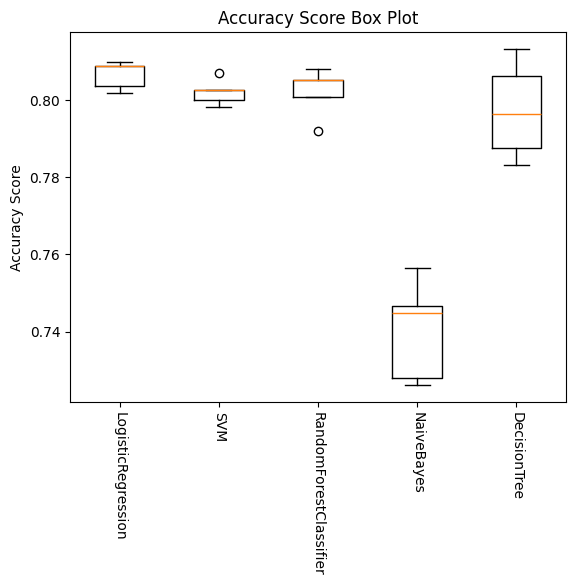

In [289]:
# Creating a dictionary of machine learning models with specified hyperparameters
# Each model is initialized with specific settings for later cross-validation

models = {
          'LogisticRegression':LogisticRegression(penalty = 'l1', C = 1, solver='liblinear' ),
          'SVM':SVC(kernel = 'linear', C = 0.1, gamma='scale', probability=True),
          'RandomForestClassifier':RandomForestClassifier(n_estimators= 200, max_samples= 0.8, max_features= 0.8, max_depth= 6),
          'NaiveBayes': GaussianNB(var_smoothing = 0.001),
          'DecisionTree':DecisionTreeClassifier( criterion= 'entropy', max_depth = 10, min_samples_leaf = 100)
         }

results = []
for model in models.values() :
    cv_score = cross_val_score(model, X_train, y_train, cv = 5)
    results.append(cv_score)

plt.boxplot(results, labels = models.keys())
plt.title('Accuracy Score Box Plot')
plt.xticks(rotation = 270)
plt.ylabel('Accuracy Score')
plt.show()

# Compare under ROC Curve

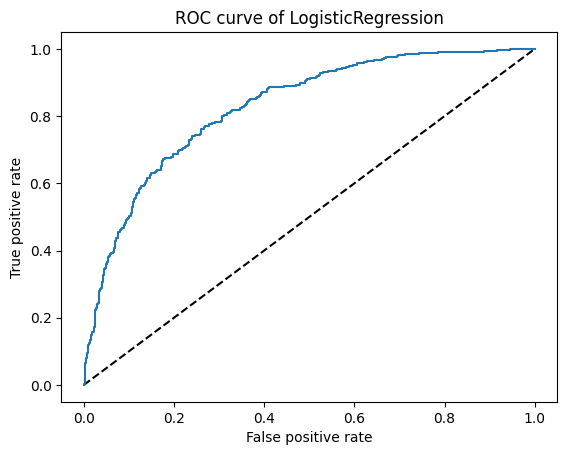

Area Under ROC curve : 0.8271632529645307
Accuracy score : 0.8009950248756219



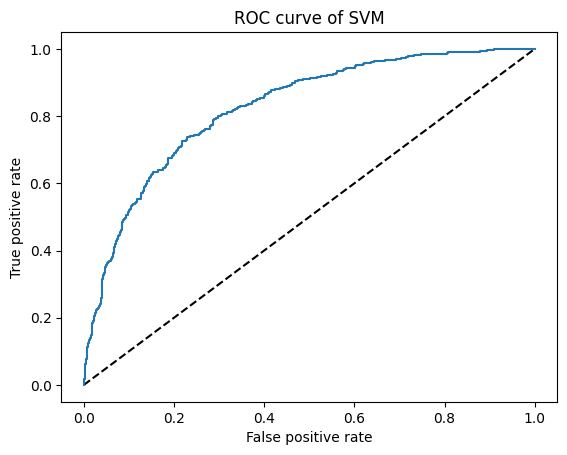

Area Under ROC curve : 0.8250019719717087
Accuracy score : 0.7981520966595593



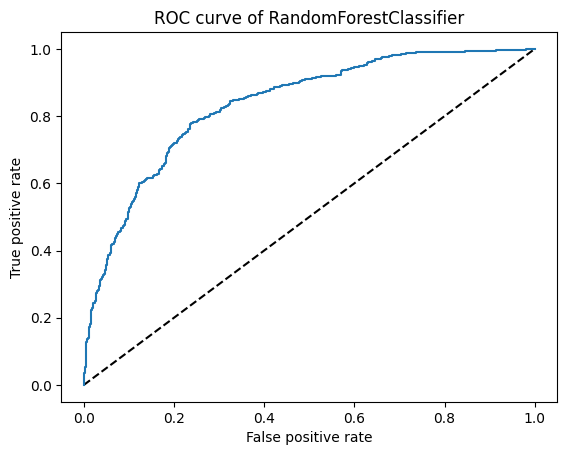

Area Under ROC curve : 0.8349354507927326
Accuracy score : 0.8009950248756219



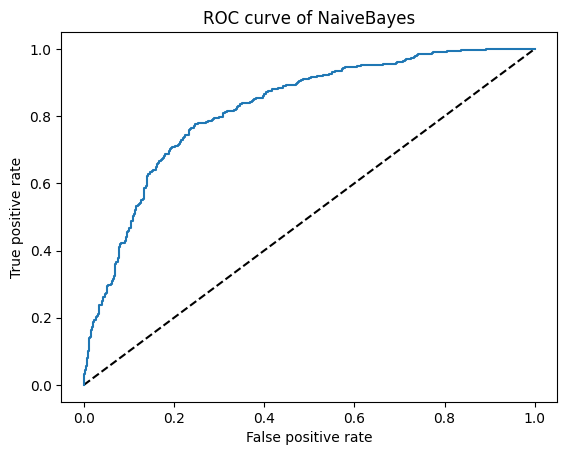

Area Under ROC curve : 0.82272237267636
Accuracy score : 0.751954513148543



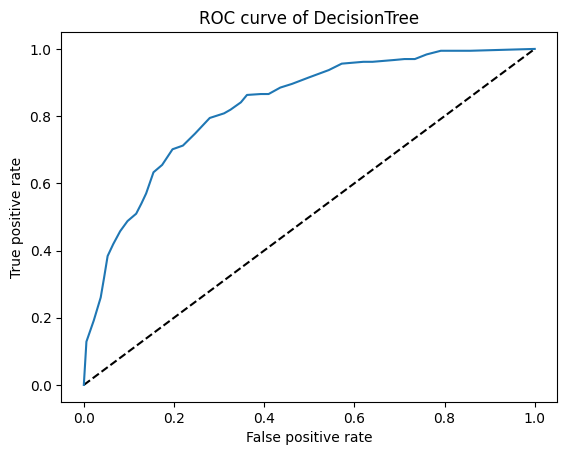

Area Under ROC curve : 0.8285436331606764
Accuracy score : 0.7953091684434968



In [292]:
# Iterating through each model in the dictionary and evaluating its performance on the test set

for name, model in models.items() :
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_probs = model.predict_proba(X_test)[:, 1]
    accuracy = accuracy_score(y_test, y_pred)

     # Calculating predicted probabilities for positive class
    
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
    plt.plot([0, 1], [0, 1], '--k')
    plt.plot(fpr, tpr)
    plt.title('ROC curve of {}'.format(name))
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.show()
    
    print('Area Under ROC curve :', roc_auc_score(y_test, y_pred_probs))
    print('Accuracy score :', accuracy)
    print()